<a href="https://colab.research.google.com/github/aliyusifov99/ml_course_utp/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


# Investigating the data

In [2]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
df.corr()['quality']

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

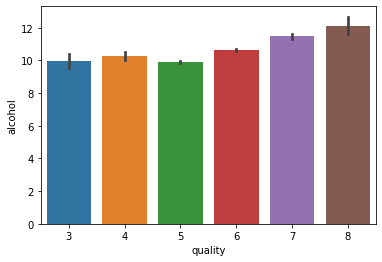

In [6]:
sns.barplot(data=df, y='alcohol', x='quality')

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

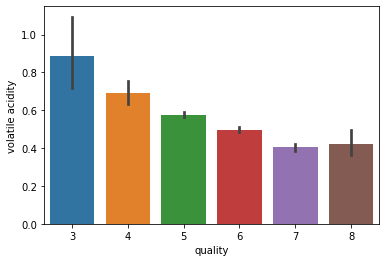

In [7]:
sns.barplot(data=df, y='volatile acidity', x='quality')

# Making the model

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [9]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [10]:
x = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol']]
y = df['quality']

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

x_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
800,7.2,0.61,0.08,4.0,0.082,26.0,108.0,0.99641,3.25,0.51,9.4
1355,6.1,0.32,0.25,1.8,0.086,5.0,32.0,0.99464,3.36,0.44,10.1
518,10.9,0.21,0.49,2.8,0.088,11.0,32.0,0.99720,3.22,0.68,11.7
1172,9.7,0.42,0.46,2.1,0.074,5.0,16.0,0.99649,3.27,0.74,12.3
566,8.7,0.70,0.24,2.5,0.226,5.0,15.0,0.99910,3.32,0.60,9.0


In [12]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

In [13]:
print(f'R-score is {regressor.score(x_test, y_test)}')

R-score is 0.37936567966383206


# Making improvements to the model: Scaling

In [14]:
from sklearn.preprocessing import StandardScaler 

In [15]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [16]:
x_train

array([[-0.64804099,  0.45690169, -0.99252703, ..., -0.39060596,
        -0.88537497, -0.98203003],
       [-1.27886338, -1.14194384, -0.11715693, ...,  0.31116519,
        -1.29268434, -0.31911138],
       [ 1.47381615, -1.74840249,  1.11865969, ..., -0.58199808,
         0.10380493,  1.19613125],
       ...,
       [-0.0172186 ,  0.40176908, -0.11715693, ..., -1.02857972,
        -0.76900087, -0.60321937],
       [-0.47599852, -0.20468957, -0.42611108, ...,  0.50255731,
        -0.71081381, -0.69792204],
       [ 0.95768874,  0.29150388, -0.271634  , ..., -1.15617447,
        -0.65262676, -0.88732737]])

In [17]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

In [18]:
print(f'R-score is {regressor.score(x_test, y_test)}')


R-score is 0.37936567966383294


In [19]:
from sklearn.ensemble import RandomForestRegressor

In [20]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

In [21]:
rf.score(x_test, y_test)

0.42727840815655316

In [22]:
x_test

array([[-0.30395605, -0.37008738, -0.06566457, ...,  0.75774682,
         0.45292724, -1.17143536],
       [-0.99212593,  0.18123867, -0.68357288, ...,  0.69394944,
        -0.24531739,  1.19613125],
       [-1.1641684 ,  0.84282992, -1.35297354, ...,  1.26812583,
        -0.01256918,  0.81732059],
       ...,
       [-0.07456609,  2.60707327, -0.94103467, ...,  0.05597568,
        -0.65262676, -1.36084069],
       [ 0.72829878, -0.81114822,  0.19179723, ..., -0.77339021,
         0.22017903, -0.41381405],
       [ 0.38421384,  0.40176908,  0.08881251, ...,  0.18357043,
        -0.53625265, -0.41381405]])

In [23]:
from sklearn.linear_model import SGDRegressor

In [24]:
regressor = SGDRegressor(loss='squared_loss')
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

regressor.score(x_test, y_test)

c:\Users\aliyu\anaconda3\envs\other\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(


0.38142331572227106

In [25]:
x = df[['fixed acidity', 'volatile acidity', 'citric acid','chlorides', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol']]
y = df['quality']

In [26]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
print(f'R-score is {regressor.score(x_test, y_test)}')

R-score is 0.37936567966383294


In [27]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print(f'R-score is {rf.score(x_test, y_test)}')


R-score is 0.43542591679000164
